# Random Forest Classifier For Heart Disease Detection

Random Forest models are a kind of non parametric models that can be used both for regression and classification. They are one of the most popular ensemble methods, belonging to the specific category of Bagging methods.

Ensemble methods involve using many learners to enhance the performance of any single one of them individually. These methods can be described as techniques that use a group of weak learners (those who on average achieve only slightly better results than a random model) together, in order to create a stronger, aggregated one.

In our case, Random Forests are an ensemble of many individual Decision Trees, the family of Machine Learning models we saw just before.

Random Forest introduce randomness and numbers into the equation, fixing many of the problems of individual decision trees, like overfitting and poor prediction power.

In a Random Forest each tree is built using a subset of the training data, and usually only a subset of the possible features. As more and more trees are built, a wider range of our data is used, and more features come into play, making very strong, aggregated models.

Individual trees are built independently, using the same procedure as for a normal decision tree but with only a random portion of the data and only considering a random subset of the features at each node. Aside from this, the training procedure is exactly the same as for an individual Decision Tree, repeated N times.

To make a prediction using a Random Forest each an individual prediction is obtained from each tree. Then, if it is a classification problem, we take the most frequent prediction as the result, and if it is a regression problem we take the average prediction from all the individual trees as the output value.

This [Data Set](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) contains 14 attributes used by Machine Learning researchers to predict the presence of heart disease in a patient. 

In [2]:

import numpy as np 
print(f"NumPy version: {np.__version__}")
import pandas as pd 
print(f"pandas version: {pd.__version__}")
import matplotlib 
print(f"matplotlib version: {matplotlib.__version__}")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')


NumPy version: 1.24.2
pandas version: 1.4.4
matplotlib version: 3.5.2


In [3]:
import pandas as pd

df = pd.read_csv('heart.csv')
df = df.iloc[:len(df)//2,:]
print(len(df))
df.head()


512


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Columns description:
- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: refers to the presence of heart disease in the patient (1=yes, 0=no)

In [4]:
df.target.value_counts() # df.target.unique()

1    273
0    239
Name: target, dtype: int64

In [20]:
disease = len(df[df['target'] == 1])
no_disease = len(df[df['target']== 0])

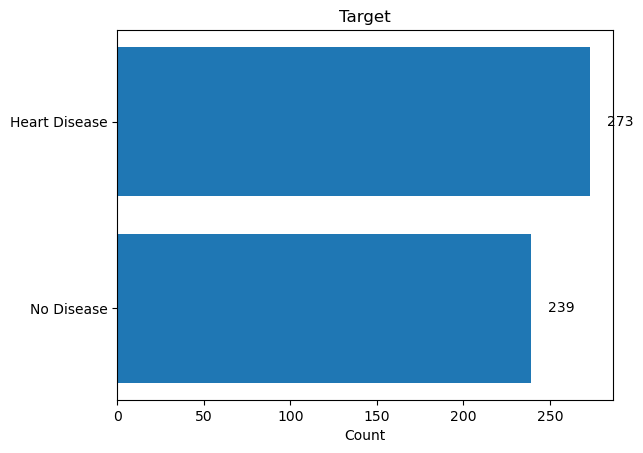

In [21]:
import matplotlib.pyplot as plt
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Target')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

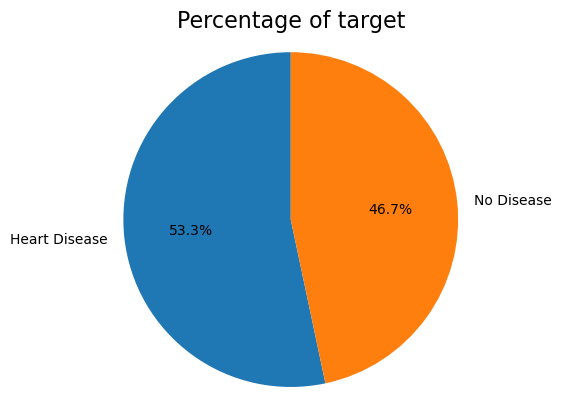

In [6]:
import matplotlib.pyplot as plt
y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of target', size=16)
plt.show() # Pie chart, where the slices will be ordered and plotted counter-clockwise:

In [7]:
df.isna().sum(axis=0) # missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
qualitative = []
quantitative = []
for feature in df.columns:
    if len(df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [9]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

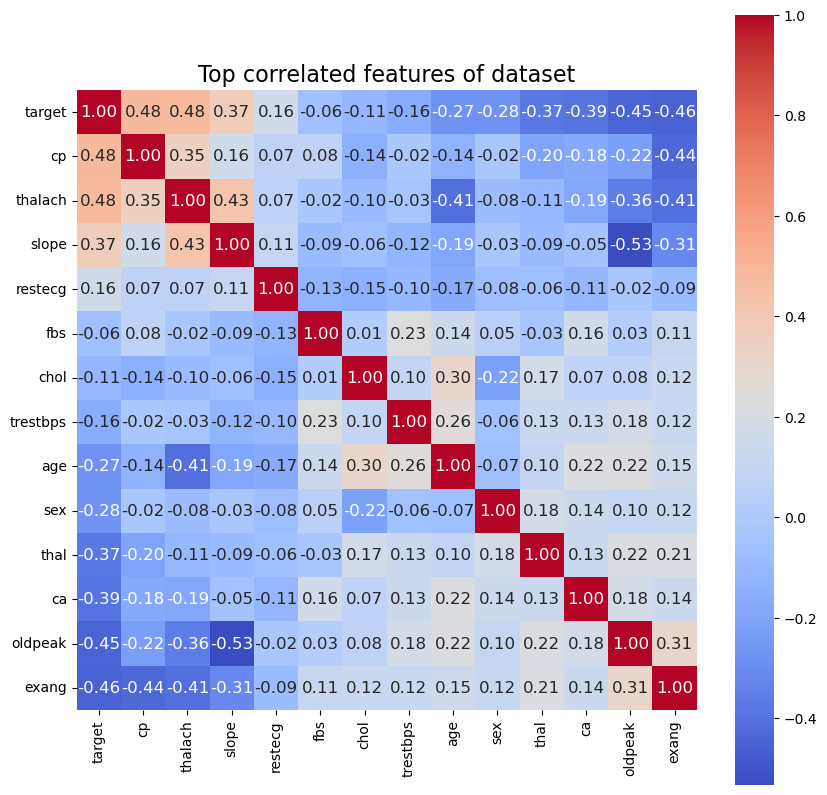

'\ncorrmat = df.corr()\nf, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))\nax.set_title("Correlation Matrix", fontsize=12)\nfilter = df.columns != \'id\'\nsns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap=\'coolwarm\', annot=True)\n'

In [11]:
top = 15
corr = df.corr()
top15 = corr.nlargest(top, 'target')['target'].index
corr_top15 = df[top15].corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_top15, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Top correlated features of dataset', size=16)
plt.show()
"""
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.set_title("Correlation Matrix", fontsize=12)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
"""

the variable with the most correlation with target is talach

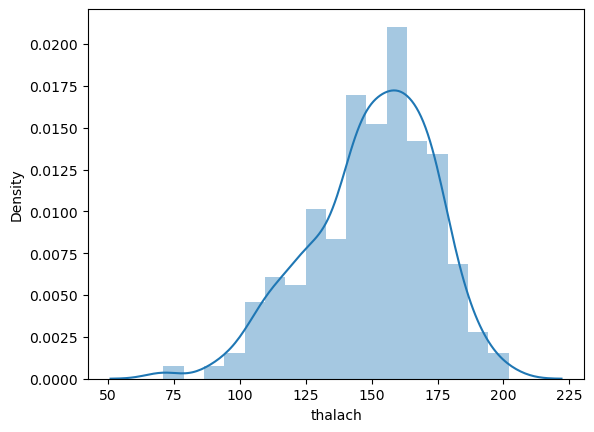

In [12]:
ax = sns.distplot(df['thalach']) # histogram distribution

In [13]:
X = df.drop('target',1)
y = df['target']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (512, 13) (512,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=18)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (256, 13) (256,)
shape of X and y respectively (test) : (256, 13) (256,)


In [16]:
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.9296875
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.54296875
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       121
           1       0.92      0.95      0.93       135

    accuracy                           0.93       256
   macro avg       0.93      0.93      0.93       256
weighted avg       0.93      0.93      0.93       256



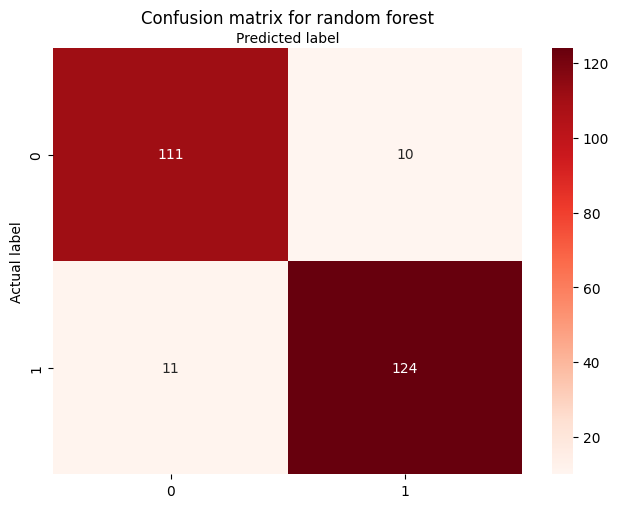

In [149]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True,cmap='Reds', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

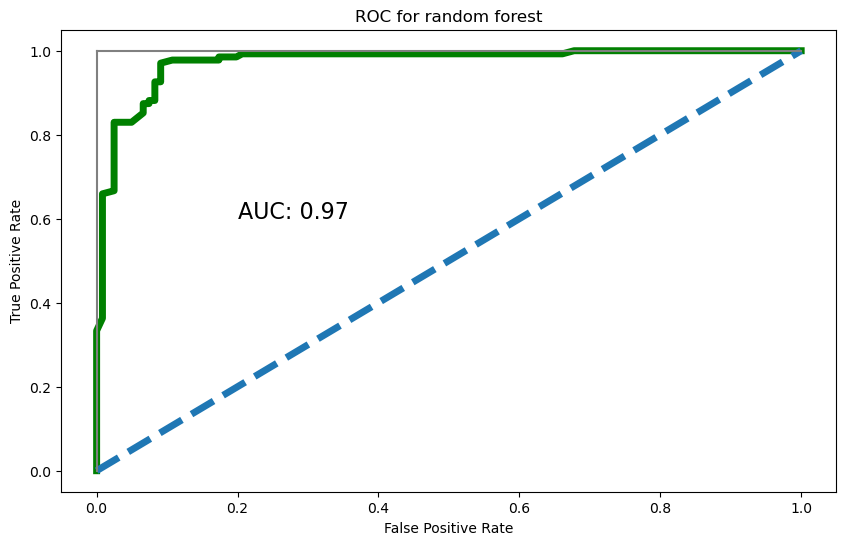

In [17]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

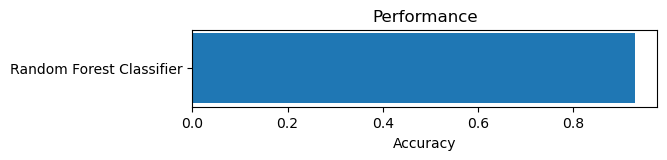

In [18]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(6, 1))
algorithms = ['Random Forest Classifier']
y_pos = np.arange(len(algorithms))
x = (score_rfc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Performance')

plt.show()


In [19]:
results=pd.DataFrame(columns=['score'])
results.loc['Random Forest Classifier']=[score_rfc]
results

,score
Random Forest Classifier,0.929688
